In [6]:
# import sys
# sys.path.append("../")
import pandas as pd
import numpy as np
import os
# from Utils import *
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as dat
import itertools


from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, f1_score

import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=2) # for label size

# from Behavior_Drift import *

In [7]:
window_sizes = [7, 14, 30, 60]

data_list = []

for tw in window_sizes:
    data_tw = pd.read_csv(f'../output/drift_toy_nb_drifts_results_w{tw}_l10.csv')
    data_tw['window_size'] = tw
    
    data_list.append(data_tw)

data = pd.concat(data_list, ignore_index=True)

# data.sort_values(['id'], ascending=True, inplace=True)

data = data.astype('int32')

data.head()

,id,nb_drifts,nb_all_drifts_detected,nb_sleeping_drift_detected,nb_work_drift_detected,nb_eating_drift_detected,window_size
0,17,1,2,2,3,2,7
1,18,1,2,2,2,3,7
2,20,1,2,2,2,5,7
3,22,1,2,2,2,2,7
4,26,1,2,3,3,2,7


In [8]:
dataset = pd.DataFrame(columns=['id', 'nb_clus', 'nb_clus_detected', 'window_size', 'type', 'label'])

for _, row in data.iterrows():
    toy_id = row['id']
    nb_clus = row['nb_drifts'] + 1
    
    listOfSeries = [pd.Series([toy_id, nb_clus, row['nb_all_drifts_detected'], row['window_size'], 'MULTIPLE', 'all'], index=dataset.columns),
                    pd.Series([toy_id, nb_clus, row['nb_sleeping_drift_detected'], row['window_size'], 'SINGLE', 'sleeping'], index=dataset.columns),
                    pd.Series([toy_id, nb_clus, row['nb_work_drift_detected'], row['window_size'], 'SINGLE', 'work'], index=dataset.columns),
                    pd.Series([toy_id, nb_clus, row['nb_eating_drift_detected'], row['window_size'], 'SINGLE', 'eating'], index=dataset.columns)]
    dataset = dataset.append(listOfSeries , ignore_index=True)



dataset.head()

,id,nb_clus,nb_clus_detected,window_size,type,label
0,17,2,2,7,MULTIPLE,all
1,17,2,2,7,SINGLE,sleeping
2,17,2,3,7,SINGLE,work
3,17,2,2,7,SINGLE,eating
4,18,2,2,7,MULTIPLE,all


Text(0.5, 1.0, 'Accuracy Score:0.56')

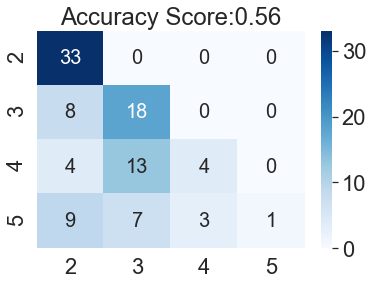

In [12]:
data_sel = dataset[(dataset.type=='MULTIPLE') & (dataset.window_size == 7)]

accuracy = accuracy_score(list(data_sel.nb_clus.values), list(data_sel.nb_clus_detected.values))

accur = accuracy_score(list(data_sel.nb_clus.values), list(data_sel.nb_clus_detected.values))

cm_multiple = confusion_matrix(list(data_sel.nb_clus.values), list(data_sel.nb_clus_detected.values))
np.set_printoptions(precision=2)


labels = [i+2 for i in range(len(cm_multiple))]
cm_multiple = pd.DataFrame(cm_multiple, index=labels, columns=labels)

cm_multiple = cm_multiple[(cm_multiple.T != 0).any()]

sns.heatmap(cm_multiple, cmap=plt.cm.Blues, annot=True, fmt='d', annot_kws={"size": 20})

plt.title(f'Accuracy Score:{accuracy:.2f}')



In [13]:
dataset

,id,nb_clus,nb_clus_detected,window_size,type,label
0,17,2,2,7,MULTIPLE,all
1,17,2,2,7,SINGLE,sleeping
2,17,2,3,7,SINGLE,work
3,17,2,2,7,SINGLE,eating
4,18,2,2,7,MULTIPLE,all
...,...,...,...,...,...,...
1595,93,5,5,60,SINGLE,eating
1596,94,5,5,60,MULTIPLE,all
1597,94,5,5,60,SINGLE,sleeping
1598,94,5,5,60,SINGLE,work
